<ipython-input-8-a432a3dd52e1>:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('msamd_14454.csv')


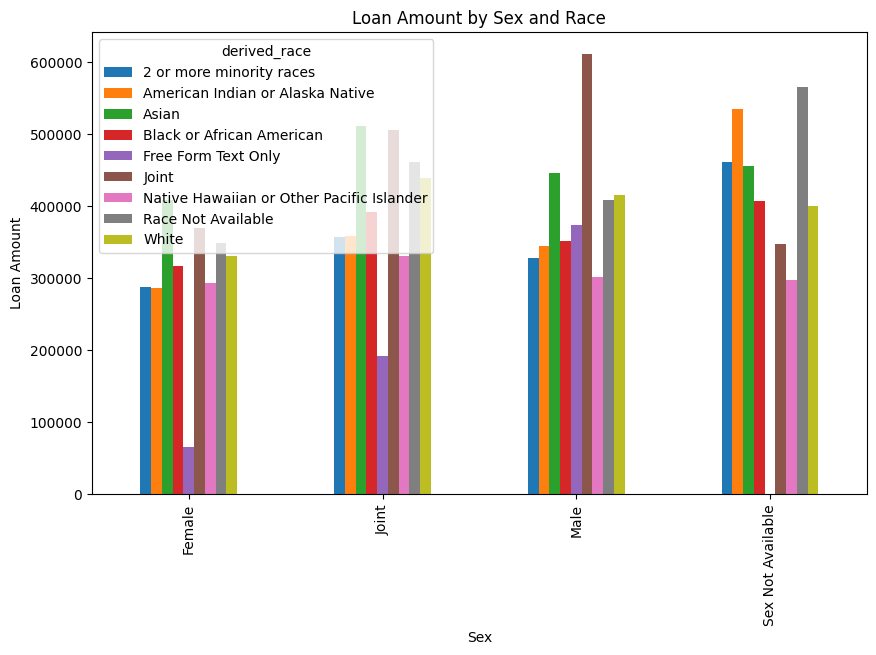

The average joint male approval amount is $616,693.55


In [ ]:
#made by sophie
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('msamd_14454.csv')

grouped_data = df.groupby(['derived_sex', 'derived_race'])['loan_amount'].mean().reset_index()

pivot_table = grouped_data.pivot(index='derived_sex', columns='derived_race', values='loan_amount')

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Loan Amount by Sex and Race')
plt.xlabel('Sex')
plt.ylabel('Loan Amount')
plt.show(5)

joint_male = df[(df['derived_sex'] == 'Male') & (df['derived_race'] == 'Joint') & (df['loan_type'] == 1)]
avg_approval_amount = joint_male['loan_amount'].mean()

print(f'The average joint male approval amount is ${avg_approval_amount:,.2f}')

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('msamd_14454.csv')
df_relevant = df[['derived_race', 'derived_sex', 'loan_amount']]

grouped = df_relevant.groupby(['derived_race', 'derived_sex']).agg({'loan_amount': ['mean', 'count']})
grouped.columns = ['loan_amount_mean', 'loan_amount_count']
sorted_groups = grouped.sort_values(by='loan_amount_mean', ascending=False)

print('The top 5 race and sex groups with the highest loan approval rates are:')
print(sorted_groups[['loan_amount_mean', 'loan_amount_count']].head(500))

<ipython-input-45-d59445b85c55>:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('msamd_14454.csv')


The top 5 race and sex groups with the highest loan approval rates are:
                                                             loan_amount_mean  \
derived_race                              derived_sex                           
Joint                                     Male                  611046.511628   
Race Not Available                        Sex Not Available     565008.261732   
American Indian or Alaska Native          Sex Not Available     535000.000000   
Asian                                     Joint                 511456.322692   
Joint                                     Joint                 505771.628995   
2 or more minority races                  Sex Not Available     461666.666667   
Race Not Available                        Joint                 461380.873866   
Asian                                     Sex Not Available     455800.000000   
                                          Male                  445500.000000   
White                                

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('msamd_14454.csv')

df_relevant = df[['derived_race', 'derived_sex', 'ffiec_msa_md_median_family_income']]
grouped = df_relevant.groupby(['derived_race', 'derived_sex']).agg({'ffiec_msa_md_median_family_income': ['mean', 'count']})
grouped.columns = ['ffiec_msa_md_median_family_income_mean', 'ffiec_msa_md_median_family_income_count']
sorted_groups = grouped.sort_values(by='ffiec_msa_md_median_family_income_mean', ascending=False)

print('The top 5 race and sex groups with the highest loan approval rates are:')
print(sorted_groups[['ffiec_msa_md_median_family_income_mean', 'ffiec_msa_md_median_family_income_count']].head(10))

<ipython-input-23-0767acab6e2f>:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('msamd_14454.csv')


The top 5 race and sex groups with the highest loan approval rates are:
                                                             ffiec_msa_md_median_family_income_mean  \
derived_race                              derived_sex                                                 
2 or more minority races                  Female                                           113700.0   
Native Hawaiian or Other Pacific Islander Sex Not Available                                113700.0   
Joint                                     Joint                                            113700.0   
                                          Male                                             113700.0   
                                          Sex Not Available                                113700.0   
Native Hawaiian or Other Pacific Islander Female                                           113700.0   
                                          Joint                                            113700.0   
 

<ipython-input-36-3ffc3b5285df>:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('msamd_14454.csv')


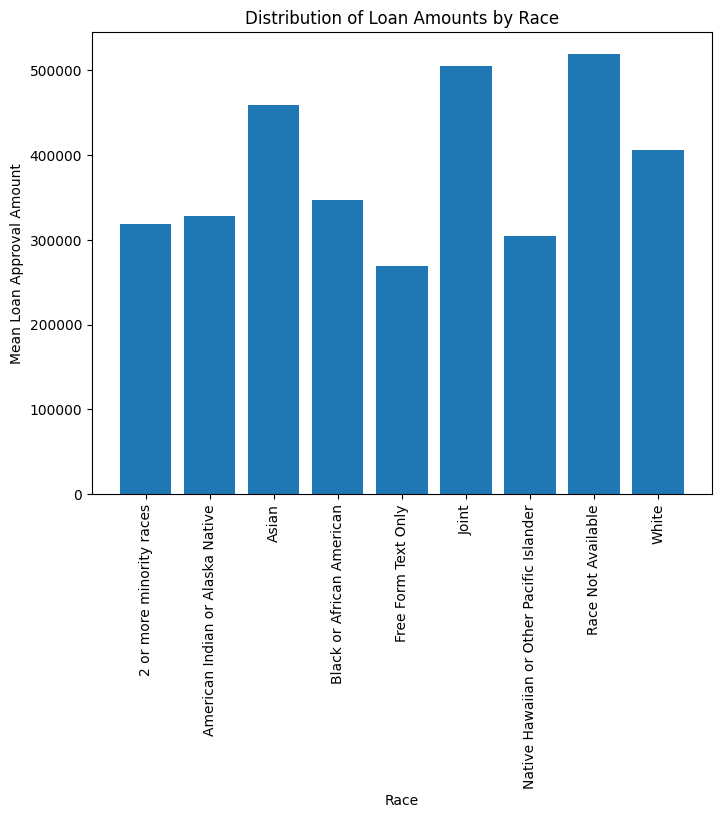

In [ ]:
df = pd.read_csv('msamd_14454.csv')

race_groups = df.groupby('derived_race')['loan_amount'].mean()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(race_groups.index, race_groups.values)
ax.set_xlabel('Race')
ax.set_ylabel('Mean Loan Approval Amount')
ax.set_title('Distribution of Loan Amounts by Race')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd


df = pd.read_csv('msamd_14454.csv')
df_approved = df[df['action_taken'] != 2]

grouped = df_approved.groupby(['derived_race', 'derived_sex']).agg({'action_taken': ['mean', 'count']})
grouped.columns = ['approval_rate', 'count']
sorted_groups = grouped.sort_values(by='approval_rate', ascending=False)

print('Approval rates for each demographic group:')
print(sorted_groups)

<ipython-input-42-c11a1cb5a973>:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('msamd_14454.csv')


Approval rates for each demographic group:
                                                             approval_rate  \
derived_race                              derived_sex                        
Free Form Text Only                       Female                  4.000000   
Race Not Available                        Sex Not Available       3.903351   
2 or more minority races                  Sex Not Available       3.333333   
Free Form Text Only                       Male                    3.111111   
Native Hawaiian or Other Pacific Islander Joint                   2.789474   
2 or more minority races                  Male                    2.585366   
Native Hawaiian or Other Pacific Islander Male                    2.565217   
Free Form Text Only                       Joint                   2.500000   
2 or more minority races                  Joint                   2.385965   
Black or African American                 Male                    2.367769   
American Indian or Al

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

print(df_relevant.info())
relevant_cols = ['derived_race', 'derived_sex', 'loan_amount', 'ffiec_msa_md_median_family_income']
df_relevant = df[relevant_cols]
df_relevant['derived_race'] = df_relevant['derived_race'].fillna('Unknown')

X = df_relevant[['derived_race', 'derived_sex', 'loan_amount', 'ffiec_msa_md_median_family_income']]
y = df_relevant['loan_amount']
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()
results = model.summary()
print(results)

grouped = df_relevant.groupby(['derived_race', 'derived_sex']).mean()['loan_amount']
diff = grouped.max() - grouped.min()
grouped['difference'] = grouped.groupby('derived_race').transform(lambda x: x.max() - x.min()).max()
sorted_groups = grouped.sort_values(by='difference', ascending=False)

print('Mean loan amounts for each demographic group:')
print(grouped)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165342 entries, 0 to 165341
Data columns (total 4 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   derived_race                       165342 non-null  object 
 1   derived_sex                        165342 non-null  object 
 2   loan_amount                        165342 non-null  float64
 3   ffiec_msa_md_median_family_income  165342 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ MB
None


<ipython-input-33-16ee6e6e93c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['derived_race'] = df_relevant['derived_race'].fillna('Unknown')


ValueError: ignored